<a href="https://colab.research.google.com/github/iitianpushkar/Schrodinger_NN_Solution_PyTorch/blob/main/Schrodinger_NN_Solution_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [100/500], Loss: 0.0003
Epoch [200/500], Loss: 0.0000
Epoch [300/500], Loss: 0.0000
Epoch [400/500], Loss: 0.0000
Epoch [500/500], Loss: 0.0000


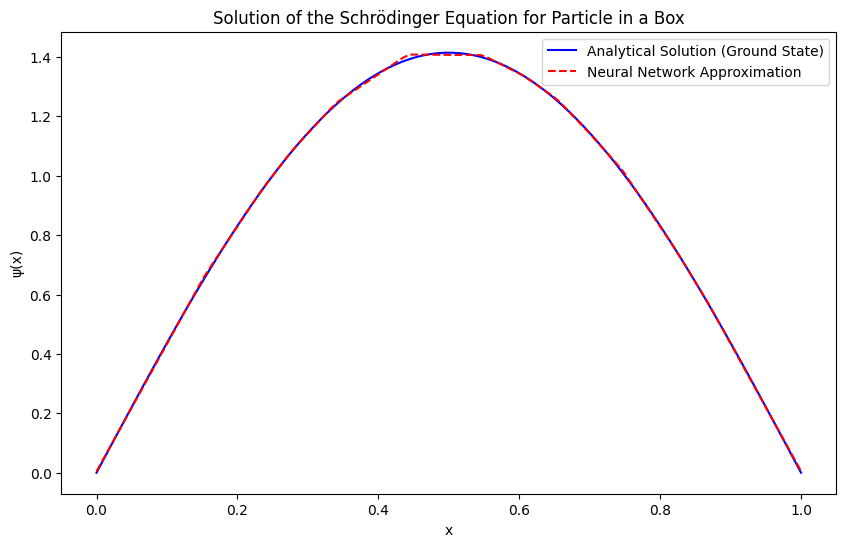

In [ ]:

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Defining constants
hbar = 1.0  # Reduced Planck's constant
m = 1.0     # Mass of particle
L = 1.0     # Length of the box


x = np.linspace(0, L, 100).reshape(-1, 1)
x_tensor = torch.tensor(x, dtype=torch.float32)

# Defining the analytical ground-state solution for the particle in a box
def psi_analytical(x):
    return np.sqrt(2/L) * np.sin(np.pi * x / L)

y_train = psi_analytical(x)
y_tensor = torch.tensor(y_train, dtype=torch.float32)

# Defining a simple feed-forward neural network to learn ψ(x)
class SchrodingerNN(nn.Module):
    def __init__(self):
        super(SchrodingerNN, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initializing model, loss function, and optimizer
model = SchrodingerNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 500
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Prediction using the trained model
y_pred = model(x_tensor).detach().numpy()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x, y_train, label="Analytical Solution (Ground State)", color='blue')
plt.plot(x, y_pred, label="Neural Network Approximation", color='red', linestyle='--')
plt.xlabel("x")
plt.ylabel("ψ(x)")
plt.title("Solution of the Schrödinger Equation for Particle in a Box")
plt.legend()
plt.show()
